In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
link = "/content/titanic_train.csv"
df = pd.read_csv(link)

In [ ]:
print(df.isnull().sum())
print('\nЧисло пропущенных значениц поля age: ', df.isnull().sum()['age'])

pclass         0
survived       0
name           0
sex            0
age          199
sibsp          0
parch          0
ticket         0
fare           0
cabin        769
embarked       0
home.dest    414
dtype: int64

Число пропущенных значениц поля age:  199


In [ ]:
df['survived'].mean()

0.382262996941896

In [ ]:
print(df.isnull().sum()/len(df))
columns_to_drop = ['cabin', 'home.dest', 'ticket']
df_dropped = df.drop(columns_to_drop, axis=1)
df_dropped.head(2)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.202854
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.783894
embarked     0.000000
home.dest    0.422018
dtype: float64


,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q


In [ ]:
df_dropped['fam_size']= df_dropped['sibsp']+ df_dropped['parch']
df_dropped = df_dropped.drop(columns=['sibsp','parch'])
print('\nФинальное число признаков: ', df_dropped.shape[1]-1)
print('n\Среднее значение колонки fam_size', df_dropped['fam_size'].mean())
df_dropped


Финальное число признаков:  7
n\Среднее значение колонки fam_size 0.8664627930682977


,pclass,survived,name,sex,age,fare,embarked,fam_size
0,3,1,"Smyth, Miss. Julia",female,NaN,7.7333,Q,0
1,3,1,"Glynn, Miss. Mary Agatha",female,NaN,7.7500,Q,0
2,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,7.2292,C,0
3,3,0,"Vovk, Mr. Janko",male,22.0,7.8958,S,0
4,3,0,"de Pelsmaeker, Mr. Alfons",male,16.0,9.5000,S,0
...,...,...,...,...,...,...,...,...
976,3,1,"Howard, Miss. May Elizabeth",female,NaN,8.0500,S,0
977,3,1,"Dorking, Mr. Edward Arthur",male,19.0,8.0500,S,0
978,2,0,"Gillespie, Mr. William Henry",male,34.0,13.0000,S,0
979,3,0,"Barton, Mr. David John",male,22.0,8.0500,S,0


In [ ]:
from itertools import product
classes = [3]
gender = ['female', 'male']
prob_to_survive = {}
for cl, gn in product(classes, gender):
  prob_to_survive['{} & pclass:{}'.format(gn,cl)] = len(df[(df['pclass']==cl)&(df['sex']==gn)& df['survived'] == 1])/len(df[(df['pclass']==cl)&(df['sex']==gn)])
prob_to_survive

{'female & pclass:3': 0.5030674846625767,
 'male & pclass:3': 0.16442048517520216}

<Axes: xlabel='age', ylabel='Count'>

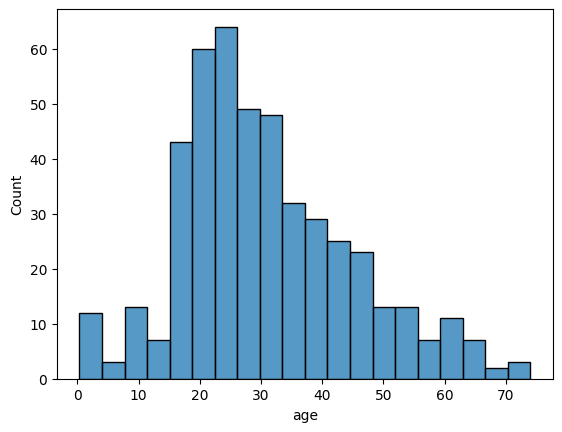

In [ ]:
sns.histplot(data=df_dropped[df_dropped['survived']==0], x = 'age',bins = 20)

<Axes: xlabel='age', ylabel='Count'>

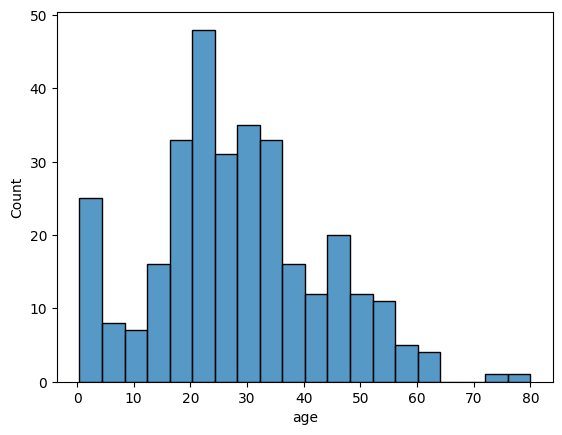

In [ ]:
sns.histplot(data=df_dropped[df_dropped['survived']==1], x='age',bins=20)

# Удаление строк с пропусками

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 41
def build_model(df):
  X, y = df.drop('survived', axis=1), df['survived']
  X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=random_state, stratify=y)
  lr=LogisticRegression(random_state=random_state,max_iter=1000).fit(X_train,y_train)
  y_pred= lr.predict(X_test)
  f_1_score=f1_score(y_test,y_pred)
  report = classification_report(y_test, y_pred, digits=3)
  return f_1_score, report

cat_features = ['name', 'sex','embarked']
non_cat_features = list(set(df_dropped.columns).difference(set(cat_features)))
score, report = build_model(df_dropped[non_cat_features].dropna())
print('f1_score_drop_na', score)

f1_score_drop_na 0.5565217391304348


# Заполнение пропусков средним

In [ ]:
from sklearn.impute import SimpleImputer
df_imputed_by_mean= df_dropped[non_cat_features].fillna(df_dropped[non_cat_features].mean()['age'])
score, report = build_model(df_imputed_by_mean)
print('f1_score_imputed_by_mean', score)

f1_score_imputed_by_mean 0.481203007518797


# Заполнение пропусков на основе обращения

In [ ]:
df_dropped['honorific']=list(df_dropped['name'].str.extract('([A-Za-z]+)\.')[0])
pd.crosstab(df_dropped['sex'], df_dropped['honorific']).style.background_gradient()


honorific,Capt,Col,Countess,Don,Dona,Dr,Major,Master,Miss,Mlle,Mr,Mrs,Ms,Rev
sex,,,,,,,,,,,,,,
female,0,0,1,0,1,0,0,0,194,2,0,145,2,0
male,1,3,0,1,0,6,1,46,0,0,572,0,0,6


In [ ]:
print('Число уникальных honorific: ', len(df_dropped['honorific'].unique()))
df_dropped['honorific'].unique()

Число уникальных honorific:  7


array(['Miss', 'Mrs', 'Mr', 'Master', 'Mlle', 'Countess', 'Major'],
      dtype=object)

In [ ]:
df_dropped['honorific'].\
replace(['Mile', 'Rev', 'Ms', 'Col', 'Dona', 'Dr', 'Countless', 'Mojor', 'Don','Capt'],\
        ['Miss', 'Mr', 'Miss', 'Mr','Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr'], inplace=True)
pd.crosstab(df_dropped['sex'], df_dropped['honorific']).style.background_gradient()

honorific,Countess,Major,Master,Miss,Mlle,Mr,Mrs
sex,,,,,,,
female,1,0,0,196,2,0,146
male,0,1,46,0,0,589,0


In [ ]:
print('Master_rate', len(df_dropped[df_dropped['honorific']=='Master'])/len(df_dropped[df_dropped['sex']=='male']))


Master_rate 0.07232704402515723


In [ ]:
dict(df_dropped.groupby('honorific')['age'].mean())


{'Countess': 33.0,
 'Major': 45.0,
 'Master': 5.128205128205129,
 'Miss': 21.980361146496815,
 'Mlle': 24.0,
 'Mr': 32.87390350877193,
 'Mrs': 37.01587301587302}

In [ ]:
df_dropped.loc[(df_dropped['age'].isnull()) & (df_dropped['honorific']=='Master'),'age'] == dict(df_dropped.groupby('honorific')['age'].mean())['Master']
df_dropped.loc[(df_dropped['age'].isnull()) & (df_dropped['honorific']=='Master'),'age'] == dict(df_dropped.groupby('honorific')['age'].mean())['Miss']
df_dropped.loc[(df_dropped['age'].isnull()) & (df_dropped['honorific']=='Master'),'age'] == dict(df_dropped.groupby('honorific')['age'].mean())['Mr']
df_dropped.loc[(df_dropped['age'].isnull()) & (df_dropped['honorific']=='Master'),'age'] == dict(df_dropped.groupby('honorific')['age'].mean())['Mrs']
print(df_dropped.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          199
fare           0
embarked       0
fam_size       0
honorific      0
dtype: int64


In [ ]:
df_imputed_by_honorific=df_dropped.drop(columns=cat_features+['honorific'])
score,report = build_model(df_imputed_by_honorific)
print('f1_score_imputed_by_honorific', score)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_dropped_one_hot = df_dropped.drop(columns=['name', 'honorific'])
df_dropped_one_hot = pd.get_dummies(df_dropped_one_hot, drop_first=True)
score, report = build_model(df_dropped_one_hot)
print('f1_score_df_dropped_one_hot', score)



ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values